In [1]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\Users\guhemant\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
fulldf=pd.read_csv("bigdf.csv")
fulldf.head(2)

,user_id,business_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
0,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,2011-01-26 00:00:00,fWKvX83p0-ka4JS3dc6E5A,5,5,Jason,"[Breakfast & Brunch, Restaurants]",Morning Glory Cafe,33.390792,-112.012504,3.87156,109,3.796954,197
1,SBbftLzfYYKItOMFwOTIJg,9yKzy9PApeiPPOUJEtnvkg,2008-05-04 00:00:00,DASdFe-g0BgfN9J2tanStg,5,1,Jennifer,"[Breakfast & Brunch, Restaurants]",Morning Glory Cafe,33.390792,-112.012504,3.87156,109,3.473684,57


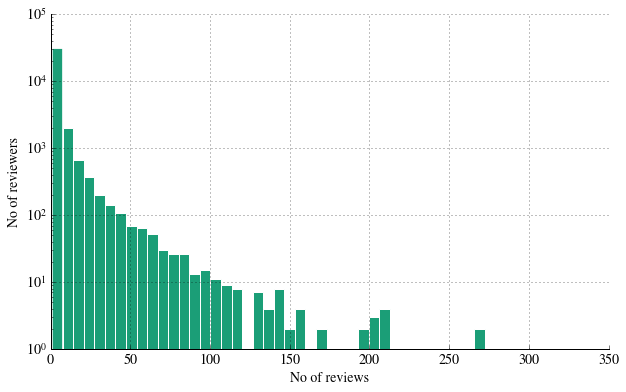

In [3]:
user_reviews = fulldf.groupby('user_id').review_id.count()
plot = user_reviews.hist(bins = 50, log=True)
plt.xlabel('No of reviews')
plt.ylabel('No of reviewers')
remove_border(plot)

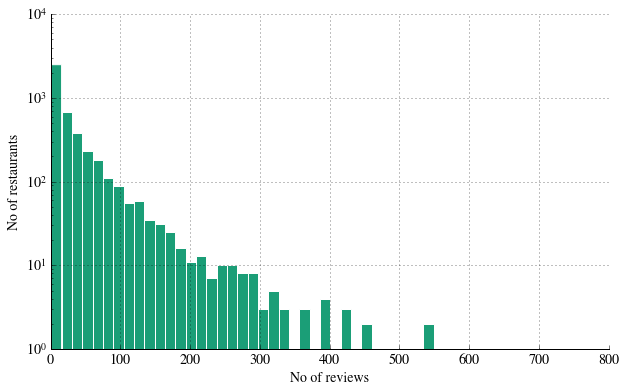

In [4]:
business_reviews = fulldf.groupby('business_id').review_id.count()
plot = business_reviews.hist(bins=50, log=True)
plt.xlabel("No of reviews")
plt.ylabel("No of restaurants")
remove_border(plot)

In [5]:
no_users = len(fulldf.user_id.unique())
no_restaurants = len(fulldf.business_id.unique())
no_users, no_restaurants

(34789, 4503)

3.74141268023


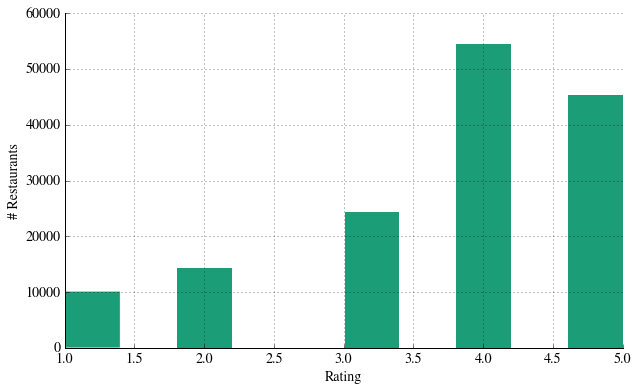

In [6]:
average_rating = fulldf.stars.mean()
plot = fulldf.stars.hist()
plt.xlabel("Rating")
plt.ylabel("# Restaurants")
remove_border(plot)
print average_rating

In [7]:
def recompute_frame(ldf):
    """
    takes a dataframe ldf, makes a copy of it, and returns the copy
    with all averages and review counts recomputed
    this is used when a frame is subsetted.
    """
    ldfu=ldf.groupby('user_id')
    ldfb=ldf.groupby('business_id')
    user_avg=ldfu.stars.mean()
    user_review_count=ldfu.review_id.count()
    business_avg=ldfb.stars.mean()
    business_review_count=ldfb.review_id.count()
    nldf=ldf.copy()
    nldf.set_index(['business_id'], inplace=True)
    nldf['business_avg']=business_avg
    nldf['business_review_count']=business_review_count
    nldf.reset_index(inplace=True)
    nldf.set_index(['user_id'], inplace=True)
    nldf['user_avg']=user_avg
    nldf['user_review_count']=user_review_count
    nldf.reset_index(inplace=True)
    return nldf

In [8]:
smalldf = fulldf[(fulldf.business_review_count>150) & (fulldf.user_review_count>60)]
smalldf = recompute_frame(smalldf)
smalldf.head(2)

,user_id,business_id,date,review_id,stars,usefulvotes_review,user_name,categories,biz_name,latitude,longitude,business_avg,business_review_count,user_avg,user_review_count
0,rLtl8ZkDX5vH5nAx9C3q5Q,eIxSLxzIlfExI6vgAbn2JA,2011-05-12 00:00:00,z4G1g3VcdfigCUtVDFRL1w,4,5,Jason,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.04,25,3.709677,62
1,C6IOtaaYdLIT5fWd7ZYIuA,eIxSLxzIlfExI6vgAbn2JA,2011-04-12 00:00:00,480M-xDpRaA1gCVCqIG4WA,4,14,Daren,"[Burgers, Hot Dogs, American (New), Restaurants]",Lobbys Beef Burgers Dogs,33.39477,-111.908894,4.04,25,4.000000,15


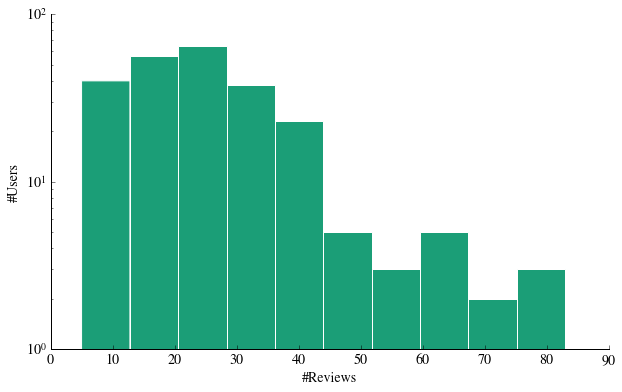

In [9]:
user_reviews = smalldf.groupby('user_id').review_id.count()
plot = user_reviews.hist(bins = 10, log =True)
plt.xlabel("#Reviews")
plt.ylabel("#Users")
plt.grid(False)
remove_border(plot)

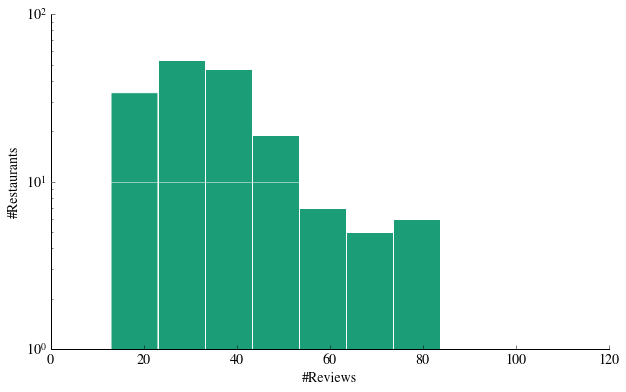

In [10]:
business_reviews = smalldf.groupby('business_id').review_id.count()
plot = business_reviews.hist(log=True)
plt.xlabel("#Reviews")
plt.ylabel("#Restaurants")
remove_border(plot)
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')

In [11]:
total_reviews = smalldf.shape[0]
total_users = smalldf.user_id.unique().shape[0]
total_businesses = smalldf.business_id.unique().shape[0]
print total_reviews, total_users, total_businesses

6165 240 172


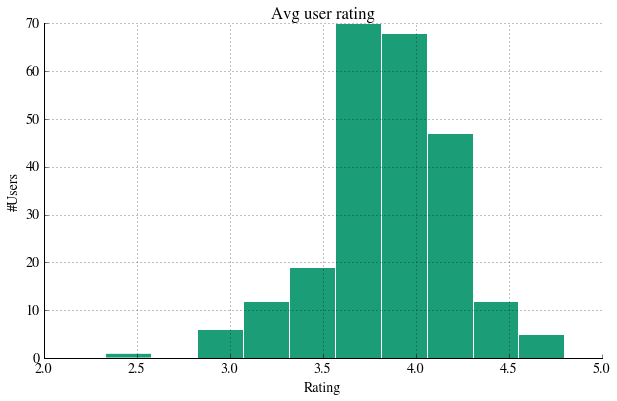

In [12]:
user_avg_rating = smalldf.groupby('user_id').stars.mean()
plot = user_avg_rating.hist()
plt.xlabel('Rating')
plt.ylabel('#Users')
plt.title('Avg user rating')
remove_border(plot)

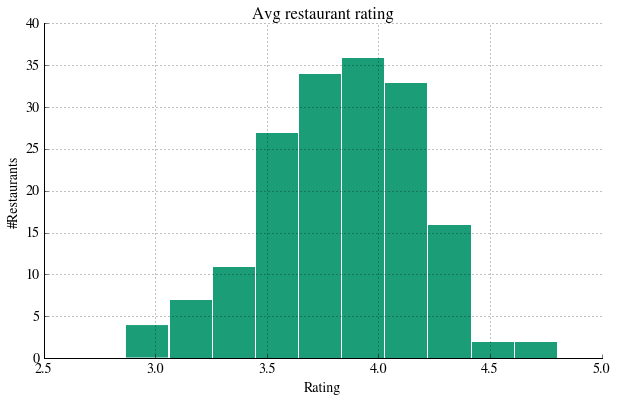

In [13]:
business_avg_rating = smalldf.groupby('business_id').stars.mean()
plot = business_avg_rating.hist()
plt.xlabel('Rating')
plt.ylabel('#Restaurants')
plt.title('Avg restaurant rating')
remove_border(plot)

In [14]:
print smalldf.stars.mean()

3.86763990268


### Common support

mean support is:  6.84679722562


(array([  7.02000000e+03,   4.98700000e+03,   1.79400000e+03,
          5.90000000e+02,   1.95000000e+02,   7.60000000e+01,
          2.20000000e+01,   1.00000000e+01,   1.00000000e+01,
          2.00000000e+00]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ]),
 <a list of 10 Patch objects>)

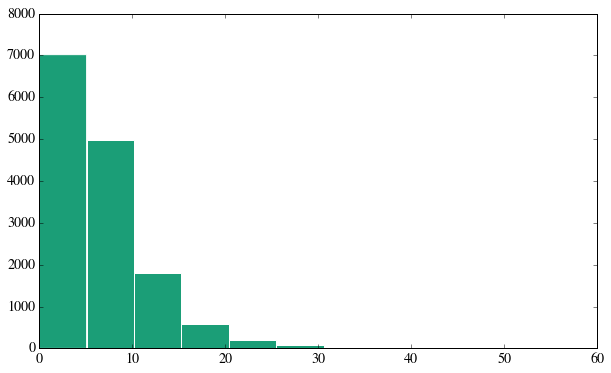

In [15]:
restaurants = smalldf.business_id.unique()
support = []

for i, rest1 in enumerate(restaurants):
    for j, rest2 in enumerate(restaurants):
        if i < j:
            rest1_reviewers = smalldf[smalldf.business_id==rest1].user_id.unique()
            rest2_reviewers = smalldf[smalldf.business_id==rest2].user_id.unique()
            common_reviews = set(rest1_reviewers).intersection(rest2_reviewers)
            support.append(len(common_reviews))
print "mean support is: ", np.mean(support)
plt.hist(support)

### Calculating similarities

In [16]:
from scipy.stats.stats import pearsonr
def pearson_sim(rest1_reviews, rest2_reviews, n_common):
    if n_common == 0:
        rho = 0
    else:
        diff1 = rest1_reviews['stars'] - rest1_reviews['user_avg']
        diff2 = rest2_reviews['stars'] - rest2_reviews['user_avg']
        rho = pearsonr(diff1, diff2)[0]
    return rho

In [17]:
def get_restaurant_reviews(restaurant_id, df, set_of_users):
    
    mask = (df.user_id.isin(set_of_users)) & (df.business_id == restaurant_id)
    reviews = df[mask]
    reviews = reviews[reviews.user_id.duplicated() == False]
    return reviews

In [18]:
def calculate_similarity(rest1, rest2, df, similarity_func):
    # find common reviewers
    rest1_reviewers = df[df.business_id==rest1].user_id.unique()
    rest2_reviewers = df[df.business_id==rest2].user_id.unique()
    common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
    n_common=len(common_reviewers)
    #get reviews
    rest1_reviews = get_restaurant_reviews(rest1, df, common_reviewers)
    rest2_reviews = get_restaurant_reviews(rest2, df, common_reviewers)
    sim=similarity_func(rest1_reviews, rest2_reviews, n_common)
    if np.isnan(sim):
        return 0, n_common
    return sim, n_common

In [19]:
class Database:
    "A class representing a database of similaries and common supports"
    
    def __init__(self, df):
        "the constructor, takes a reviews dataframe like smalldf as its argument"
        database={}
        self.df=df
        self.uniquebizids={v:k for (k,v) in enumerate(df.business_id.unique())}
        keys=self.uniquebizids.keys()
        l_keys=len(keys)
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)
        
    def populate_by_calculating(self, similarity_func):
        """
        a populator for every pair of businesses in df. takes similarity_func like
        pearson_sim as argument
        """
        items=self.uniquebizids.items()
        for b1, i1 in items:
            for b2, i2 in items:
                if i1 < i2:
                    sim, nsup=calculate_similarity(b1, b2, self.df, similarity_func)
                    self.database_sim[i1][i2]=sim
                    self.database_sim[i2][i1]=sim
                    self.database_sup[i1][i2]=nsup
                    self.database_sup[i2][i1]=nsup
                elif i1==i2:
                    nsup=self.df[self.df.business_id==b1].user_id.count()
                    self.database_sim[i1][i1]=1.
                    self.database_sup[i1][i1]=nsup
                    

    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.uniquebizids[b1]][self.uniquebizids[b2]]
        nsup=self.database_sup[self.uniquebizids[b1]][self.uniquebizids[b2]]
        return (sim, nsup)

In [20]:
db=Database(smalldf)
db.populate_by_calculating(pearson_sim)

In [21]:
db.get("z3yFuLVrmH-3RJruPEMYKw", "zruUQvFySeXyEd7_rQixBg")

(0.39904554525734559, 7)

In [22]:
def shrunk_sim(sim, n_common, reg=3.):
    "takes a similarity and shrinks it down by using the regularizer"
    ssim=(n_common*sim)/(n_common+reg)
    return ssim

In [23]:
from operator import itemgetter
def knearest(restaurant_id, set_of_restaurants, dbase, reg=3., k = 7):
    similar = []
    for restaurant in set_of_restaurants:
        if restaurant != restaurant_id:
            sim, nsup = db.get(restaurant, restaurant_id)
            ssim = shrunk_sim(sim= sim, n_common=nsup)
            similar.append((restaurant, ssim, nsup))
    similar = sorted(similar, key = itemgetter(1), reverse=True)
    return similar[0:k]

In [24]:
testbizid="eIxSLxzIlfExI6vgAbn2JA"
testbizid2="L-uPZxooP_ziXCtRrWi8Pw"

In [25]:
def biznamefromid(df, theid):
    return df['biz_name'][df['business_id']==theid].values[0]
def usernamefromid(df, theid):
    return df['user_name'][df['user_id']==theid].values[0]

In [26]:
print testbizid, biznamefromid(smalldf,testbizid)
print testbizid2, biznamefromid(smalldf, testbizid2)

eIxSLxzIlfExI6vgAbn2JA Lobbys Beef Burgers Dogs
L-uPZxooP_ziXCtRrWi8Pw Café Monarch


### Recommendations

In [27]:
tops=knearest(testbizid, smalldf.business_id.unique(), db, k=7, reg=3.)
print "For ",biznamefromid(smalldf, testbizid), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Lobbys Beef Burgers Dogs , top matches are:
0 La Condesa Gourmet Taco Shop | Sim 0.598714448434 | Support 6
1 Citizen Public House | Sim 0.571428571429 | Support 4
2 FnB | Sim 0.527129890943 | Support 5
3 Defalco's Italian Grocery | Sim 0.519456555658 | Support 6
4 Republic Ramen + Noodles | Sim 0.519140146937 | Support 5
5 unPhogettable | Sim 0.5 | Support 3
6 Haus Murphy's | Sim 0.467637235308 | Support 3


In [28]:
tops2=knearest(testbizid2, smalldf.business_id.unique(), db, k=7, reg=3.)
print "For ",biznamefromid(smalldf, testbizid2), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops2):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Café Monarch , top matches are:
0 Postino Arcadia | Sim 0.625 | Support 5
1 The Main Ingredient Ale House And Café | Sim 0.571428571429 | Support 4
2 Brio Tuscan Grille | Sim 0.571428571429 | Support 4
3 Kazimierz World Wine Bar | Sim 0.5 | Support 3
4 Harlow's Cafe | Sim 0.5 | Support 3
5 The Fry Bread House | Sim 0.5 | Support 3
6 Cien Agaves Tacos & Tequila | Sim 0.5 | Support 3


In [29]:
def get_user_top_choices(user_id, df, numchoices=5):
    "get the sorted top 5 restaurants for a user by the star rating the user gave them"
    udf=df[df.user_id==user_id][['business_id','stars']].sort(['stars'], ascending=False).head(numchoices)
    return udf
testuserid="7cR92zkDv4W3kqzii6axvg"
print "For user", usernamefromid(smalldf,testuserid), "top choices are:" 
bizs=get_user_top_choices(testuserid, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Vern top choices are:


C:\Users\guhemant\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


['Tee Pee Mexican Food',
 'Local Breeze',
 "Carly's Bistro",
 'District American Kitchen and Wine Bar',
 'Sonora Mesquite Grill']

In [45]:
def get_top_recos_for_user(userid, df, dbase, n=5, k=7, reg=3.):
    bizs = get_user_top_choices(userid, df, numchoices=n)['business_id'].values
    user_reviewed = df[df.user_id == userid].business_id.values
    recos = []
    for restaurant in bizs:
        res = knearest(restaurant, df.business_id.unique(),dbase, k = k, reg = reg)
        for r in res:
            if r[0] not in user_reviewed:
                recos.append(r)
                
# Removing duplicates        
    ids = [r[0] for r in recos]
    uni_ids = {k:0 for k in list(set(ids))}
    recos1 = []
    for res in recos:
        if uni_ids[res[0]] == 0:
            recos1.append(res)
        else:
            uni_ids[res[0]] = 1
    recos2 = []
    for r, s, nc in recos1:
        avg_rate = df[df.business_id == r].stars.mean()
        recos2.append((r, avg_rate))
        
    recos2 = sorted(recos2, key = itemgetter(1), reverse=True)
    
    if n < len(recos2):
        return recos2[0:n]
    else:
        return recos2

In [31]:
print "For user", usernamefromid(smalldf,testuserid), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Vern the top recommendations are:


C:\Users\guhemant\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Rokerij | Average Rating | 4.37931034483
Wildfish Seafood Grille | Average Rating | 4.29411764706
Defalco's Italian Grocery | Average Rating | 4.23255813953
Cornish Pasty Company | Average Rating | 4.20689655172
Pappadeaux Seafood Kitchen | Average Rating | 4.18518518519


### User based recommendation with predicted rating

In this section, we shift our focus to more fine-grained predictions about each user, and try to predict what _rating_ a user would give to a restaurant they have never tried before. To do this, we will try to personalize the information we use even further, and only pool information from restaurants that the user has rated.

This allows us to return to the original problem of prediction $Y_{um}$ for a restaurant $m$ that user $u$ has never rated before. Using our newly computed similarity metrics, we can modify our original baseline estimate by pulling in information from the user's neighborhood of the restaurant $m$, and predict $Y_{um}$ as:

$$ \hat{Y_{um}} = \hat Y^{baseline}_{um}\, + \,\frac{\sum\limits_{j \in S^{k}(m;u)} s_{mj} ( Y_{uj} - \hat Y^{baseline}_{uj} )}{\sum\limits_{j \in S^{k}(m;u)} s_{mj} } $$

where $s^{k}(m;u)$ is the $k$ neighbor items of item $m$ which have been rated by user $u$.

Now, this is not a particularly good assumption, especially in the situation where a restaurant is new (new item problem) or a user is new (cold start problem), or in the case when there are very few reviewers of a restaurant, or very few reviews by a user respectively. However, one must start somewhere!

Notice that in adding in the similarity term, we subtract the baseline estimate from the observed rating of the user's neighbor items.

In [32]:
"""def knearest_among_userrated(restaurant_id, user_id, df, dbase, k=7, reg = 3.):
    restaurants = knearest(restaurant_id, df.business_id.unique(), dbase, k=k, reg=reg)[0]
    similar = []
    for restaurant in restaurants:
        new_res = knearest(restaurant, df.business_id.unique(), dbase, k=k, reg=reg)
        similar.append(new_res)
    ids = [res[0] for res in similar]
    uni_ids = {k:0 for k in list(set(ids))}
    similar1 = []
    for res in similar:
        if uni_ids[res[0]] == 0:
            similar1.append[res]
        else:
            uni_ids[res[0]] = 1
    return similar1"""

'def knearest_among_userrated(restaurant_id, user_id, df, dbase, k=7, reg = 3.):\n    restaurants = knearest(restaurant_id, df.business_id.unique(), dbase, k=k, reg=reg)[0]\n    similar = []\n    for restaurant in restaurants:\n        new_res = knearest(restaurant, df.business_id.unique(), dbase, k=k, reg=reg)\n        similar.append(new_res)\n    ids = [res[0] for res in similar]\n    uni_ids = {k:0 for k in list(set(ids))}\n    similar1 = []\n    for res in similar:\n        if uni_ids[res[0]] == 0:\n            similar1.append[res]\n        else:\n            uni_ids[res[0]] = 1\n    return similar1'

In [33]:
def knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=7, reg=3.):
    dfuser=df[df.user_id==user_id]
    bizsuserhasrated=dfuser.business_id.unique()
    return knearest(restaurant_id, bizsuserhasrated, dbase, k=k, reg=reg)

In [37]:
def rating(df, dbase, restaurant_id, user_id, k=7, reg=3.):
    mu=df.stars.mean()
    users_reviews=df[df.user_id==user_id]
    nsum=0.
    scoresum=0.
    nears=knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=k, reg=reg)
    restaurant_mean=df[df.business_id==restaurant_id].business_avg.values[0]
    user_mean=users_reviews.user_avg.values[0]
    scores=[]
    for r,s,nc in nears:
        scoresum=scoresum+s
        scores.append(s)
        r_reviews_row=users_reviews[users_reviews['business_id']==r]
        r_stars=r_reviews_row.stars.values[0]
        r_avg=r_reviews_row.business_avg.values[0]
        rminusb=(r_stars - (r_avg + user_mean - mu))
        nsum=nsum+s*rminusb
    baseline=(user_mean +restaurant_mean - mu)
    #we might have nears, but there might be no commons, giving us a pearson of 0
    if scoresum > 0.:
        val =  nsum/scoresum + baseline
    else:
        val=baseline
    return val

In [38]:
def get_other_ratings(restaurant_id, user_id, df):
    "get a user's rating for a restaurant and the restaurant's average rating"
    choice=df[(df.business_id==restaurant_id) & (df.user_id==user_id)]
    users_score=choice.stars.values[0]
    average_score=choice.business_avg.values[0]
    return users_score, average_score

In [35]:
print "User Average", smalldf[smalldf.user_id==testuserid].stars.mean(),"for",usernamefromid(smalldf,testuserid)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid, k=7, reg=3.),"|","Average",biz_avg 

User Average 3.5652173913 for Vern
Predicted ratings for top choices calculated earlier:
Rokerij | 4.71714023074 | Average 4.37931034483
Wildfish Seafood Grille | 4.27594504172 | Average 4.29411764706
Defalco's Italian Grocery | 3.822223075 | Average 4.23255813953
Cornish Pasty Company | 4.62810510121 | Average 4.20689655172
Pappadeaux Seafood Kitchen | 4.08845573953 | Average 4.18518518519


In [39]:
print "for user",usernamefromid(smalldf,testuserid), 'avg', smalldf[smalldf.user_id==testuserid].stars.mean() 
for biz_id in bizs:
    print "----------------------------------"
    print biznamefromid(smalldf, biz_id)
    print "Predicted Rating:",rating(smalldf, db, biz_id, testuserid, k=7, reg=3.) 
    u,a=get_other_ratings(biz_id, testuserid, smalldf)
    print "Actual User Rating:",u,"Avg Rating",a

for user Vern avg 3.5652173913
----------------------------------
Tee Pee Mexican Food
Predicted Rating: 3.52640184162
Actual User Rating: 5 Avg Rating 3.04347826087
----------------------------------
Local Breeze
Predicted Rating: 4.2280987611
Actual User Rating: 5 Avg Rating 4.0
----------------------------------
Carly's Bistro
Predicted Rating: 3.99008654065
Actual User Rating: 5 Avg Rating 3.5
----------------------------------
District American Kitchen and Wine Bar
Predicted Rating: 3.80281696528
Actual User Rating: 4 Avg Rating 3.55263157895
----------------------------------
Sonora Mesquite Grill
Predicted Rating: 4.08382083034
Actual User Rating: 4 Avg Rating 4.38461538462


In [40]:
def compare_results(stars_actual, stars_predicted, ylow=-10, yhigh=15, title=""):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    fig=plt.figure()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    ax=plt.scatter(df.actual, df.predicted, alpha=0.2, s=30, label="predicted")
    plt.ylim([ylow,yhigh])
    plt.plot([1,5],[1,5], label="slope 1")
    xp=[1,2,3,4,5]
    yp=df.groupby('actual').predicted.mean().values
    plt.plot(xp,yp,'k', label="means")
    sig=df.groupby('actual').predicted.std().values
    plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.legend(frameon=False)
    remove_border()
    plt.grid(False)
    plt.title(title)
    print np.mean(np.abs(df.predicted) < 15)

In [41]:
def make_results_plot(df,k,reg):
    uid=smalldf.user_id.values
    bid=smalldf.business_id.values
    actual=smalldf.stars.values
    predicted=np.zeros(len(actual))
    counter=0
    for user_id, biz_id in zip(uid,bid):
        predicted[counter]=rating(smalldf, db, biz_id, user_id, k=k, reg=reg) 
        counter=counter+1
    compare_results(actual, predicted)

k=3, reg=3.
1.0
k=3, reg=15.
1.0
k=10, reg=3.
0.996431467964
k=10, reg=15.
0.996431467964


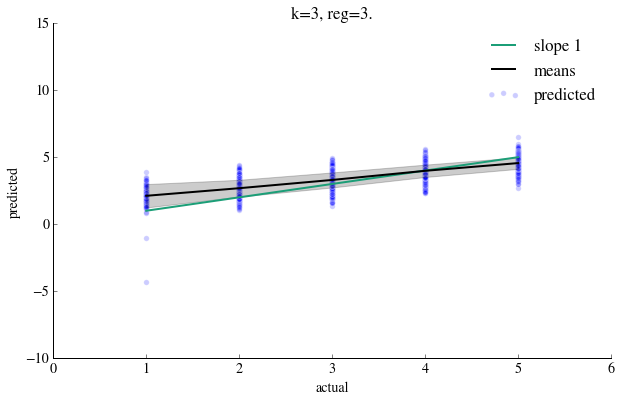

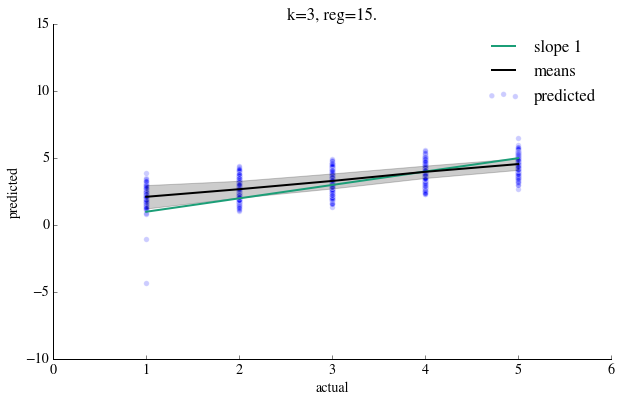

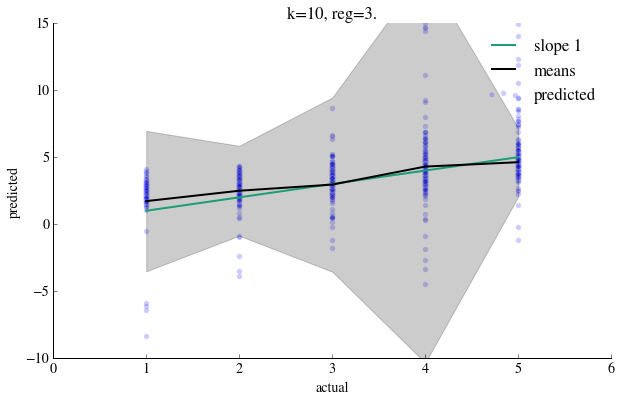

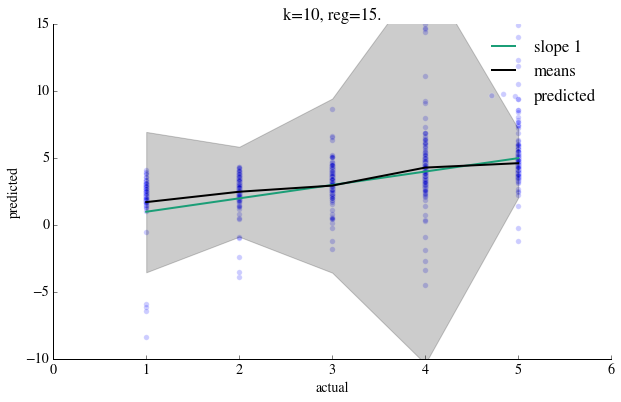

In [43]:
print "k=3, reg=3."
make_results_plot(smalldf,3,3.)
plt.title("k=3, reg=3.")

print "k=3, reg=15."
make_results_plot(smalldf,3,15.,)
plt.title("k=3, reg=15.")

print "k=10, reg=3."
make_results_plot(smalldf,10,3.)
plt.title("k=10, reg=3.")

print "k=10, reg=15."
make_results_plot(smalldf,10,15.,)
plt.title("k=10, reg=15.")

### IMPORTANT SOLUTION ADDENDUM

The wide wings we see above are in the error graph are due to small values of the denominator in the similarity sum.

Indeed the very idea of nearest neighbor should engender in you the idea of distances; and distances should not be negative.

We can fix this for the case of perarson coefficient by just a simple rescaling to the 0-1 range!

$$ \rho \rightarrow \frac{\rho+1}{2} $$.

This translates into changing the shrunk score:

$$ s \rightarrow \frac{s}{2} + \frac{f}{2} $$

where 

$$ f = \frac{N_{common}}{N_{common}+reg} $$

Note that the new quantity is really an inverse distance, and thus we'll sort by its smallness as before.

In [46]:
def knearest_pos(restaurant_id, set_of_restaurants, dbase, k=7, reg=3.):
    """
    Given a restaurant_id, dataframe, and database, get a sorted list of the
    k most similar restaurants from the entire database.
    """
    similars=[]
    for other_rest_id in set_of_restaurants:
        if other_rest_id!=restaurant_id:
            sim, nc=dbase.get(restaurant_id, other_rest_id)
            ssim=shrunk_sim(sim, nc, reg=reg)
            similars.append((other_rest_id, ssim/2.0 + float(nc)/(float(nc)+reg), nc ))
    similars=sorted(similars, key=itemgetter(1), reverse=True)
    return similars[0:k]

def knearest_amongst_userrated_pos(restaurant_id, user_id, df, dbase, k=7, reg=3.):
    dfuser=df[df.user_id==user_id]
    bizsuserhasrated=dfuser.business_id.unique()
    return knearest_pos(restaurant_id, bizsuserhasrated, dbase, k=k, reg=reg)

In [47]:
def rating_pos(df, dbase, restaurant_id, user_id, k=7, reg=3.):
    mu=df.stars.mean()
    users_reviews=df[df.user_id==user_id]
    nsum=0.
    scoresum=0.
    nears=knearest_amongst_userrated_pos(restaurant_id, user_id, df, dbase, k=k, reg=reg)
    restaurant_mean=df[df.business_id==restaurant_id].business_avg.values[0]
    user_mean=users_reviews.user_avg.values[0]
    scores=[]
    for r,sold,nc in nears:
        s=sold/2.0
        shrink_factor=float(nc)/(float(nc)+reg)
        s=s+shrink_factor/2.0
        scoresum=scoresum+s
        scores.append(s)
        r_reviews_row=users_reviews[users_reviews['business_id']==r]
        r_stars=r_reviews_row.stars.values[0]
        r_avg=r_reviews_row.business_avg.values[0]
        rminusb=(r_stars - (r_avg + user_mean - mu))
        nsum=nsum+s*rminusb
    baseline=(user_mean +restaurant_mean - mu)
    #we might have nears, but there might be no commons, giving us a pearson of 0
    if scoresum > 0.:
        val =  nsum/scoresum + baseline
    else:
        val=baseline
    return val

In [48]:
def make_results_plot_pos(df,k,reg):
    uid=smalldf.user_id.values
    bid=smalldf.business_id.values
    actual=smalldf.stars.values
    predicted=np.zeros(len(actual))
    counter=0
    for user_id, biz_id in zip(uid,bid):
        predicted[counter]=rating_pos(smalldf, db, biz_id, user_id, k=k, reg=reg) 
        counter=counter+1
    compare_results(actual, predicted, ylow=1, yhigh=5)

k=2, reg=1.
1.0
k=2, reg=15.
1.0
k=15, reg=1.
1.0
k=15, reg=15.
1.0


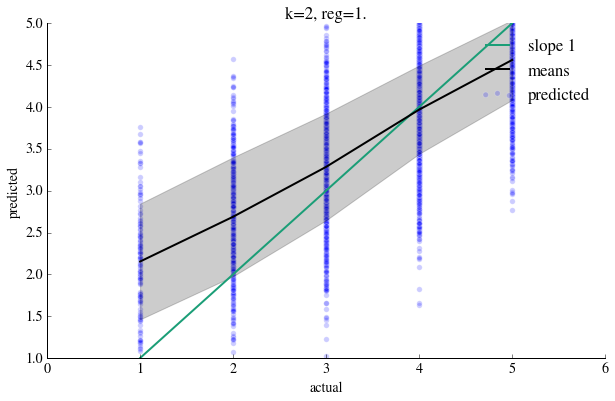

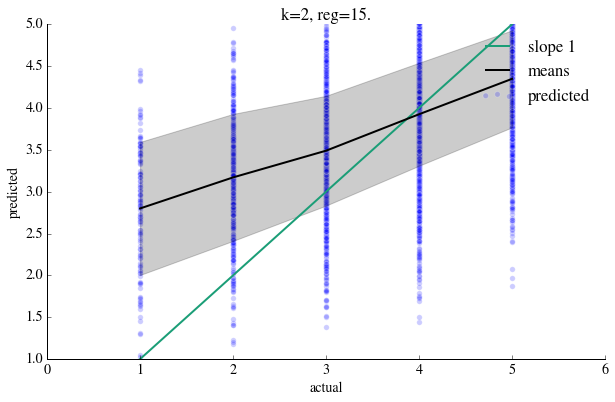

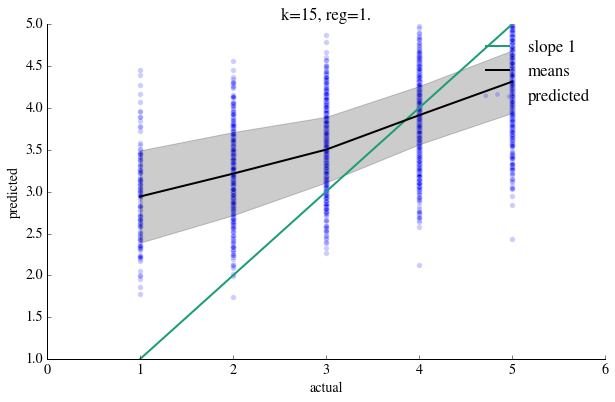

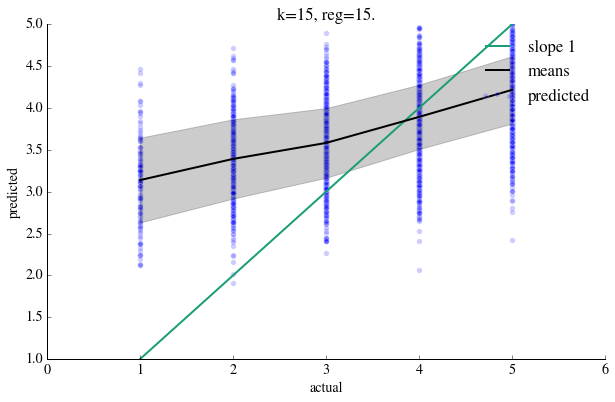

In [49]:
print "k=2, reg=1."
make_results_plot_pos(smalldf,2,1.)
plt.title("k=2, reg=1.")

print "k=2, reg=15."
make_results_plot_pos(smalldf,2,15.,)
plt.title("k=2, reg=15.")

print "k=15, reg=1."
make_results_plot_pos(smalldf,15,1.)
plt.title("k=15, reg=1.")

print "k=15, reg=15."
make_results_plot_pos(smalldf,15,15.,)
plt.title("k=15, reg=15.")

NOTICE: when comparing graphs note that the limits have changed to make the bias-variance comparison more visible. The regularizer is set to 1 to reduce the regularization to something small, rather than something optimal, as well. Also to make things more extreme, I choose k=15 rather than k=10.

#### Bayesian model based recommendations

In this part we will use Bayesian and Gibbs sampler techniques to write a recommendor that uses Bayesian techniques to impute ratings.

####Rating Model Specification####

To make this model concrete, we can write down our probability model as a generative process. First, we define the following quantities:

Counts:

* $L$: The number of latent factors.

* $U$: The number of users.

* $M$: The number of items (restaurants).

* $N$: The number of observed ratings.

Data:

* $Y_{um}$: The star rating given to restaurant $m$ by user $u$.
* $Y$: The full collection of observed star ratings.

Item-specific quantities:

* $\gamma_m$: An item-specific parameter vector of length $L+1$. The first element of $\gamma_m$, denoted $\gamma_m[0]$ is the item-specific bias. The remaining $L$ elements of $\gamma_m$, denoted $\gamma_m[1:]$, are the latent factors associated with item $m$.

* $\Gamma$: An $M$ by $L+1$ matrix where the $m$th row is $\gamma_m$.

User-specific quantities:

* $\theta_u$: A user-specific parameter vector of length $L+1$. The first element of $\theta_u$, denoted $\theta_u[0]$ is the user-specific bias. The remaining $L$ elements of $\theta_u$, denoted $\theta_u[1:]$, are user $u$'s preferences for the latent factors.

* $\Theta$: A $U$ by $L+1$ matrix where the $u$th row is $\theta_u$.

Global quantities:

* $\mu$: The overall ratings mean.

* $\sigma$: The residual variance of ratings after the mean, bias terms, and latent factors have been taken into account.

Using these quantities, we can specify our model for each rating $Y_{um}$ similarly to a linear regression:

$$Y_{um} = \mu + \theta_{u}[0] + \gamma_{m}[0] + \theta_{u}[1:]^{\top}\gamma_{m}[1:] + \epsilon_{um}$$

where

$$\epsilon_{um} \sim N(0, \sigma).$$

We also assume the following priors on the user-specific and item-specific parameters:

$$
\begin{align*}
\gamma_m &\sim MVN(\mathbf 0, \Lambda_\gamma^{-1})\\
\theta_u &\sim MVN(\mathbf 0, \Lambda_\theta^{-1}),
\end{align*}
$$

where $MVN$ means multivariate normal, $\mathbf 0$ is vector of length $L+1$ filled with zeros, and $\Lambda_\theta^{-1}$ and $\Lambda_\gamma^{-1}$ are $L+1 \times L+1$ covariance matrices.

####Distribution of $\gamma_{m'}$ given $Y, \mu, \sigma, \Gamma_{-m'}, \Theta$####

Intuitively, this is the distribution of the item-specific parameters for item $m'$, imagining that all of the other unknowns are fixed.

More precisely, we want to draw from the distribution of $\gamma_{m'}$ conditional on the data $Y$ and all other unknowns -- that is, $\mu$, $\sigma$, all of $\Theta$, and all of $\Gamma$ except for $\gamma_{m'}$, which we denote $\Gamma_{-m}$.

Note that in the model specification above, the only places that $\gamma_{m'}$ appears are in the regression equations for each $Y_{um}$ that involves item $m'$. If we write out just these equations, we get a system of the following form,

$$Y_{um'} = \mu + \theta_{u}[0] + \gamma_{m'}[0] + \theta_{u}[1:]^{\top}\gamma_{m'}[1:] + \epsilon_{um'},$$

with one equation for each $u$ that rated item $m'$. Now, because 

If we move all of the fully known terms to the left-hand side, we obtain the system:

$$Y_{um'} - \mu - \theta_{u}[0] = \gamma_{m'}[0] + \theta_{u}[1:]^{\top}\gamma_{m'}[1:] + \epsilon_{um'}.$$

Notice that, because we assume that $\theta_{u}$ is known, this equation now fits cleanly into the form of a linear regression, where $\gamma_{m'}$ is the vector of unknown coefficients. This means that the posterior distribution for $\gamma_{m'}$ conditional on everything else is the same as the posterior for the coefficients of a Bayesian linear regression of $(Y_{um'} - \mu - \theta_{u}[0])$ on $\theta_{u}[1:]$ and an intercept.

Let's denote the set of users who rated item $m'$ as $(u_1, \cdots, u_g)$. Then, we can define the following vector and matrix:

\begin{align*}
Y_{m'} = \left(\begin{array}{c} Y_{u_1m'}-\mu-\theta_{u_1}[0]\\ \vdots \\ Y_{u_gm'}-\mu-\theta_{u_g}[0]\end{array}\right), \qquad
X_{m'} &= \left(\begin{array}{cc} 1 & \theta_{u_1}[1:]^\top \\ \vdots & \vdots \\ 1 & \theta_{u_g}[1:]^\top\end{array}\right),
\end{align*}

where $Y_{m'}$ is a vector of length $g$ and $X_{m'}$ is a $g \times L+1$ matrix.

The draw from $\gamma_{m'}$ given everything else then has the form:
$$ \gamma_{m'} \mid Y, \mu, \sigma, \Gamma_{-m'}, \Theta \sim MVN\left(Q_{m'}^{-1} \frac{1}{\sigma^2}X_{m'}^\top Y_{m'}, Q_{m'}^{-1}\right)$$
where
$$ Q_{m'} = \left(\frac{1}{\sigma^2}X_{m'}^\top X_{m'} + \Lambda_\gamma\right).$$

#### Distribution of $\theta_{u'}$ given $Y, \mu, \sigma, \Gamma, \Theta_{-u'}$####

Intuitively, this is the distribution of the user-specific parameters for user $u'$, imagining that all of the other unknowns are fixed.

We can use a very similar argument to the one above. We can denote the set of items rated by user $u'$ as $(m_1, \cdots, m_g)$ and define the vector and matrix:
\begin{align*}
Y_{u'} = \left(\begin{array}{c} Y_{u'm_1}-\mu-\gamma_{m_1}[0] \\ \vdots \\ Y_{u'm_g}-\mu-\gamma_{m_g}[0]\end{array}\right), \qquad
X_{u'} &= \left(\begin{array}{cc} 1 & \gamma_{m_1}[1:]^\top \\ \vdots & \vdots \\ 1 & \gamma_{m_g}[1:]^\top\end{array}\right),
\end{align*}

where $Y_{u'}$ is a vector of length $g$ and $X_{u'}$ is a $g \times L+1$ matrix.

the draw from $\theta_{u'}$ given everything else has the form:
$$ \theta_{u'} \mid Y, \mu, \sigma, \Gamma, \Theta_{-u'} \sim MVN\left(Q_{u'}^{-1} \frac{1}{\sigma^2}X_{u'}^\top Y_{u'}, Q_{u'}^{-1}\right)$$
where
$$ Q_{u'}= \left(\frac{1}{\sigma^2}X_{u'}^\top X_{u'} + \Lambda_\theta\right).$$

In [51]:
#Item-specific parameters given all else
def gamma_m_draw(X_m, Y_m, sig2, Lambda_gamma):

    #Compute matrices that define conditional posterior.
    Q_m_inv = np.linalg.inv(np.dot(X_m.T, X_m)/sig2+Lambda_gamma)
    XtY = np.dot(X_m.T, Y_m)

    #Draw item-specific parameters.
    return np.random.multivariate_normal(np.dot(Q_m_inv, XtY)/sig2, Q_m_inv)

In [52]:
#User-specific parameters given all else
def theta_u_draw(X_u, Y_u, sig2, Lambda_theta):
    #Compute matrices that define conditional posterior.
    Q_u_inv = np.linalg.inv(np.dot(X_u.T, X_u)/sig2+Lambda_theta)
    XtY = np.dot(X_u.T, Y_u)
    
    #Draw the user-specific parameters
    return np.random.multivariate_normal(np.dot(Q_u_inv, XtY)/sig2, Q_u_inv)

In [56]:
"""
Function
--------
factor_gibbs

Runs a gibbs sampler to infer mean, variance, user-specific, and item-specific
parameters.

Inputs
-------
data: A dataframe containing ratings data.
L: Dimension of latent factors.
maxit: Number of samples to draw from posterior.
Lambda_theta_diag: Hyperparameter controlling regularization of Theta.
Lambda_gamma_diag: Hyperparameter controlling regularization of Gamma.
progress: if true, print iteration number every 100 iterations.

Outputs
--------
Dictionary with elements
mu: Draws of mu. 1D array of length maxiter.
sig2: Draws of sig2, residual _variance_. 1D array of length maxiter.
theta: Draws of Theta. U-by-L-by-maxiter array.
gamma: Draws of Gamma. M-by-L-by-maxiter array.
EY: Draws of fitted values of Y. N-by-maxiter array.
"""
def factor_gibbs(data, L, maxit, Lambda_theta_diag, Lambda_gamma_diag, progress=True):
    data = data.copy()
    N = data.shape[0]

    #Create indices that allow us to map users and restaurants to rows
    #in parameter vectors.
    uusers, uidx = np.unique(data.user_id, return_inverse=True)
    uitems, midx = np.unique(data.business_id, return_inverse=True)

    nusers = uusers.size
    nitems = uitems.size

    #Add numerical indices to dataframe.
    data["uidx"] = uidx
    data["midx"] = midx

    #Group observations by user and by business.
    ugroups = data.groupby("uidx")
    mgroups = data.groupby("midx")

    all_avg = data.stars.mean()
    u_avg = ugroups.stars.mean()
    m_avg = mgroups.stars.mean()

    #Initialize parameters and set up data structures for
    #holding draws.
    #Overall mean
    mu = all_avg
    mu_draws = np.zeros(maxit)
    #Residual variance
    sig2 = 0.5
    sig2_draws = np.zeros(maxit)

    #Matrix of user-specific bias and L latent factors.
    theta = np.zeros([nusers, L+1])
    theta[:,0] = u_avg-all_avg
    theta_draws = np.zeros([nusers, L+1, maxit])

    #Matrix of item-specific bias and L latent factors.
    gamma = np.zeros([nitems, L+1])
    gamma[:,0] = m_avg-all_avg
    gamma_draws = np.zeros([nitems, L+1, maxit])

    #Matrix for holding the expected number of stars
    #for each observation at each draw from the posterior.
    EY_draws = np.zeros([data.shape[0], maxit])

    #Inverse covariance matrices from the prior on each theta_u
    #and gamma_b. These are diagonal, like Ridge regression.
    Lambda_theta = np.eye(L+1)*Lambda_theta_diag
    Lambda_gamma = np.eye(L+1)*Lambda_gamma_diag

    #Main sampler code
    for i in range(maxit):
        if i%100==0 and progress:
            print i

        #The entire regression equation except for the overall mean.
        nomu = np.sum(theta[data.uidx,1:]*gamma[data.midx,1:], axis=1) +\
                  theta[data.uidx,0] + gamma[data.midx,0]

        #Compute the expectation of each observation given the current
        #parameter values.
        EY_draws[:,i]=mu+nomu

        #Draw overall mean from a normal distribution
        mu = np.random.normal(np.mean(data.stars-nomu), np.sqrt(sig2/N))
        #Draw overall residual variance from a scaled inverse-Chi squared distribution.
        sig2 = np.sum(np.power(data.stars-nomu-mu,2))/np.random.chisquare(N-2)
        
        #For each item
        for mi,itemdf in mgroups:
            #Gather relevant observations, and subtract out overall mean and
            #user-specific biases, which we are holding fixed.
            Y_m = itemdf.stars-mu-theta[itemdf.uidx,0]
            #Build the regression design matrix implied by holding user factors
            #fixed.
            X_m = np.hstack((np.ones([itemdf.shape[0],1]),
                             theta[itemdf.uidx,1:]))
            gamma[mi,:] = gamma_m_draw(X_m, Y_m, sig2, Lambda_gamma)
            
        #For each user
        for ui,userdf in ugroups:
            #Gather relevant observations, and subtract out overall mean and
            #business-specific biases, which we are holding fixed.
            Y_u = userdf.stars-mu-gamma[userdf.midx,0]
            #Build the regression design matrix implied by holding business factors
            #fixed.
            X_u = np.hstack((np.ones([userdf.shape[0],1]),
                             gamma[userdf.midx,1:]))
            
            theta[ui,:] = theta_u_draw(X_u, Y_u, sig2, Lambda_theta)

        #Record draws
        mu_draws[i] = mu
        sig2_draws[i] = sig2
        theta_draws[:,:,i] = theta
        gamma_draws[:,:,i] = gamma

    return {"mu": mu_draws, "sig2": sig2_draws,
            "theta": theta_draws, "gamma": gamma_draws,
            "EY": EY_draws}

In [57]:
gibbs_out = factor_gibbs(smalldf, 2, 1000, 0.1, 0.1)
burnin = 200
predicted=np.mean(gibbs_out['EY'][:,burnin:], axis=1)

0
100
200
300
400
500
600
700
800
900


1.0


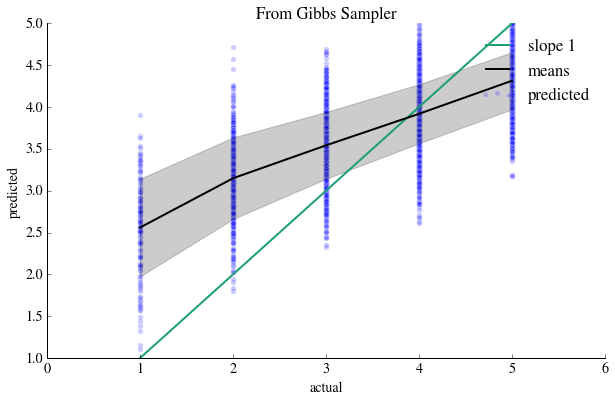

In [58]:
compare_results(smalldf.stars.values, predicted, ylow=1, yhigh=5, title="From Gibbs Sampler")

0
100
200
300
400
500
600
700
800
900
1.0


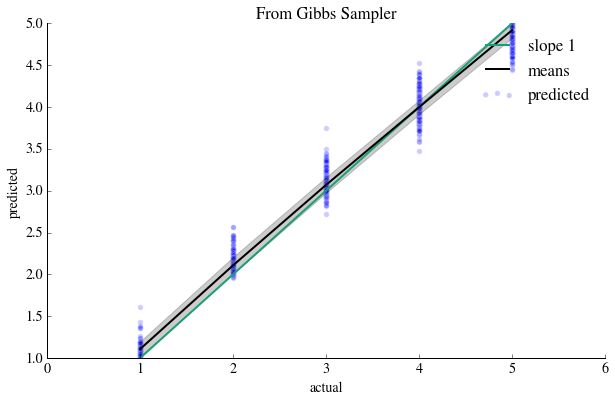

In [59]:
gibbs_out = factor_gibbs(smalldf, 15, 1000, 0.1, 0.1)
burnin = 200
predicted=np.mean(gibbs_out['EY'][:,burnin:], axis=1)
compare_results(smalldf.stars.values, predicted, ylow=1, yhigh=5, title="From Gibbs Sampler")

The fit here looks much better, both in terms of tracking the green line and in terms of the within-group precision (as measured by the grey band). A model at the variance limit (that is, one that is extremely overfit) with low bias would have a mean line that tracks exactly with the green line and an almost non-existent gray area.